In [4]:
# import matplotlib.pyplot as plt
import os, sys
import numpy as np
# import pandas as pd
from keras import backend as K
from keras.layers import Conv2D, Dense, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model, Sequential, load_model, clone_model
from process import get_data
import cv2

# Load Data

Loading mp4 files as img array. X is a set of 2 frames, each 1 apart. Y is the frame in between these two frames

In [2]:
X, Y = get_data("data/rat_video.mp4")

In [3]:
X = np.array(X).astype('float64')
Y = np.array(Y).astype('float64')

X = X
Y = Y

im1 = X[:, 0, :, :]
im2 = X[:, 1, :, :]

# Stack Data

Carefully stack data in correct ordered format

Create isolated r, g, and b frames and a total one

In [5]:
r1 = im1[:, :, :, 0]
g1 = im1[:, :, :, 1]
b1 = im1[:, :, :, 2]

r2 = im2[:, :, :, 0]
g2 = im2[:, :, :, 1]
b2 = im2[:, :, :, 2]

X_r = np.stack([r1, r2], axis=-1)
X_g = np.stack([g1, g2], axis=-1)
X_b = np.stack([b1, b2], axis=-1)

Y_r = Y[:,:,:,0:1]
Y_g = Y[:,:,:,1:2]
Y_b = Y[:,:,:,2:3]

X_train = np.stack([r1, r2, g1, g2, b1, b2], axis=-1)

# Load Basic Model for all inputs

In [6]:
basic = Sequential()


basic.add(Conv2D(32, (1, 1), strides=(1, 1), padding="SAME", input_shape = (None, None, 6)))
basic.add(LeakyReLU())
basic.add(Conv2D(52, (4, 4), strides=(1, 1), padding="SAME", input_shape = (None, None, 6)))
basic.add(LeakyReLU())
basic.add(Conv2D(72, (3, 3), strides=(1, 1), activation=None, padding="SAME"))
basic.add(LeakyReLU())
basic.add(Conv2D(40, (1, 1), strides=(1, 1), activation=None, padding="SAME"))
basic.add(LeakyReLU())
basic.add(Conv2D(3, (1, 1), strides=(1, 1), activation='relu', padding="SAME"))

basic.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

losses = []

In [ ]:
for i in range(7):    

    res = basic.fit(X_train, Y, shuffle=True, epochs=1)

    pred = basic.predict(X_train[50:55])
    print("Average Pixel Value:", pred.mean())
    cv2.imwrite('images/epoch' + str(i+4) + '.png', pred[0])
    cv2.imwrite('y.png', Y[50])

Epoch 1/1
409/409 [==============================] - 446s 1s/step - loss: 8.5332 - acc: 0.9136
Average Pixel Value: 109.507
Epoch 1/1
256/409 [=================>............] - ETA: 2:57 - loss: 7.5887 - acc: 0.9085

In [19]:
pred = basic.predict(X_train[50:55])
print("Average Pixel Value:", pred.mean())
cv2.imwrite('images/epoch3.png', pred[0])
cv2.imwrite('y.png', Y[50])

Average Pixel Value: 112.466


True

In [7]:
basic.save_weights("meansabserrorPlusFCInput.h5py")

# Create Models to train 1 color at a time

In [75]:
light = Sequential()

light.add(Conv2D(32, (4, 4), strides=(1, 1), activation='relu', padding="SAME", input_shape = (None, None, 2)))
light.add(Conv2D(52, (3, 3), strides=(1, 1), activation='relu', padding="SAME"))
light.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding="SAME"))
light.add(Conv2D(1, (1, 1), strides=(1, 1), activation='relu', padding="SAME"))

light.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['accuracy'])

light_r = clone_model(light)
light_g = clone_model(light)
light_b = clone_model(light)

light_r.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['accuracy'])
light_g.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['accuracy'])
light_b.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['accuracy'])

In [73]:
print("Training Model Red")
light_r.fit(X_r, Y_r, epochs=1)

Training Model Red
Epoch 1/1
224/409 [===============>..............] - ETA: 1:35 - loss: 0.0000e+00 - acc: 1.2490e-04

KeyboardInterrupt: 

In [ ]:
print("Training Model Green")
light_g.fit(X_g, Y_g, epochs=3)

In [ ]:
print("Training Model Blue")
light_b.fit(X_b, Y_b, epochs=3)

In [46]:
red = light_r.predict(X_r[0:5]).reshape([5,360,360])
green = light_g.predict(X_g[0:5]).reshape([5,360,360])
blue = light_b.predict(X_b[0:5]).reshape([5,360,360])

res = np.stack([red, green, blue], axis=-1)

In [55]:
blue.reshape([5,360,360,1]) < Y_b[0:5]

array([[[[ True],
         [ True],
         [ True],
         ..., 
         [ True],
         [ True],
         [ True]],

        [[ True],
         [ True],
         [ True],
         ..., 
         [ True],
         [ True],
         [ True]],

        [[ True],
         [ True],
         [ True],
         ..., 
         [ True],
         [ True],
         [ True]],

        ..., 
        [[ True],
         [ True],
         [ True],
         ..., 
         [ True],
         [ True],
         [ True]],

        [[ True],
         [ True],
         [ True],
         ..., 
         [ True],
         [ True],
         [ True]],

        [[ True],
         [ True],
         [ True],
         ..., 
         [ True],
         [ True],
         [ True]]],


       [[[ True],
         [ True],
         [ True],
         ..., 
         [ True],
         [ True],
         [ True]],

        [[ True],
         [ True],
         [ True],
         ..., 
         [ True],
         [ True],
    

In [47]:
res.shape

(5, 360, 360, 3)

In [48]:
cv2.imwrite("boom.png", res[0]*255)

True

In [26]:
import PIL.ImageEnhance as e
from PIL import Image
import cv2

In [30]:
ep = Image.open('images/epoch8 (1).png')

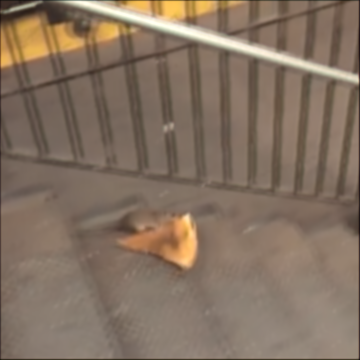

In [31]:
ep

In [35]:
x = e.Sharpness(ep)

In [50]:
for i in range(5, 10):
    x.enhance(i).show()